In [9]:
# Import  libraries that are required for making strategy 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [20]:
# Download stock data for Amazon and Apple both stocks 

start_date = "2020-01-10"
end_date = "2024-01-10"


In [21]:
# using Yfinance api to access stock data for specific time period
amzn = yf.download('AMZN', start= start_date, end= end_date)
aapl = yf.download('AAPL', start= start_date, end= end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
# reseting index for easier access of Date its important for proepr df 
amzn = pd.DataFrame(amzn)
amzn.reset_index(inplace=True)
aapl = pd.DataFrame(aapl)
aapl.reset_index(inplace=True)

In [24]:
#cleaning the data perform dimension reduction 
amzn.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)
aapl.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)

In [25]:
amzn.head()

,index,Date,Open,Close
0,0,2020-01-10,95.268501,94.157997
1,1,2020-01-13,94.565498,94.565002
2,2,2020-01-14,94.293999,93.472000
3,3,2020-01-15,93.612503,93.100998
4,4,2020-01-16,94.149498,93.897003


In [26]:
aapl.head()

,index,Date,Open,Close
0,0,2020-01-10,77.650002,77.582497
1,1,2020-01-13,77.910004,79.239998
2,2,2020-01-14,79.175003,78.169998
3,3,2020-01-15,77.962502,77.834999
4,4,2020-01-16,78.397499,78.809998


In [27]:
#calculating Night and Day returns for Amazon( i do specific task for each stock )

amzn['Night_Return %'] = ((amzn['Open'] - amzn['Close'].shift(1))/amzn['Close'].shift(1))
amzn['Night_Return %'] = amzn['Night_Return %'].fillna(0)
amzn['Night_Return %']

amzn['Day_Return %'] = ((amzn['Open'] - amzn['Close'])/amzn['Open'])

In [28]:
# Count the number of times the stock has given positive and negative returns during the selected period

AMZ_Nightly_Positive_count = amzn['Night_Return %'].gt(0).value_counts()[1]
AMZ_Nightly_Negative_count = amzn['Night_Return %'].lt(0).value_counts()[1]
print("# of times Amazon gave positive NIght Returns : " , AMZ_Nightly_Positive_count )
print("# of times Amazon gave Negative NIght Returns : " , AMZ_Nightly_Negative_count )

AMZ_Day_Positive_count = amzn['Day_Return %'].gt(0).value_counts()[1]
AMZ_Day_Negative_count = amzn['Day_Return %'].lt(0).value_counts()[1]
print("# of times Amazon gave positive DAY Returns : " , AMZ_Day_Positive_count )
print("# of times Amazon gave Negative DAY Returns : " , AMZ_Day_Negative_count )

# of times Amazon gave positive NIght Returns :  442
# of times Amazon gave Negative NIght Returns :  432
# of times Amazon gave positive DAY Returns :  500
# of times Amazon gave Negative DAY Returns :  499


C:\Users\amitr\AppData\Local\Temp\ipykernel_19444\797566662.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AMZ_Nightly_Positive_count = amzn['Night_Return %'].gt(0).value_counts()[1]
C:\Users\amitr\AppData\Local\Temp\ipykernel_19444\797566662.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AMZ_Nightly_Negative_count = amzn['Night_Return %'].lt(0).value_counts()[1]
C:\Users\amitr\AppData\Local\Temp\ipykernel_19444\797566662.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

In [29]:
# Add columns for the Gap-Up and Gap-Down stragegy - specify the positions for Amazon
amzn["position"] = np.nan
amzn.loc[amzn["Open"] >= amzn["Close"].shift(1), "position"] = 1
amzn.loc[amzn["Open"] < amzn["Close"].shift(1), "position"] = -1

In [30]:
# calculate Gap-Up and Gap-Down strategy's returns for Amazon

# calculate intraday returns using open and close
amzn["rtn"] = (amzn['Close'] - amzn['Open']) / amzn['Open']
amzn['strategy_rtn'] = amzn["rtn"] * amzn["position"]

# calculate cumulative returns
amzn['strategy_cum_rtn'] = (amzn['strategy_rtn'] + 1).cumprod()

In [31]:
# calculate BUY and HOLD returns....

amzn["daily_rtn"] = amzn["Close"].pct_change()
amzn['bh_cum_rtn'] = (amzn['daily_rtn'] + 1).cumprod()

Cumulative % NIght Returns in Amazon :  83.12291922255291
Cumulative % Day Returns in Amazon :  -17.54018994160913


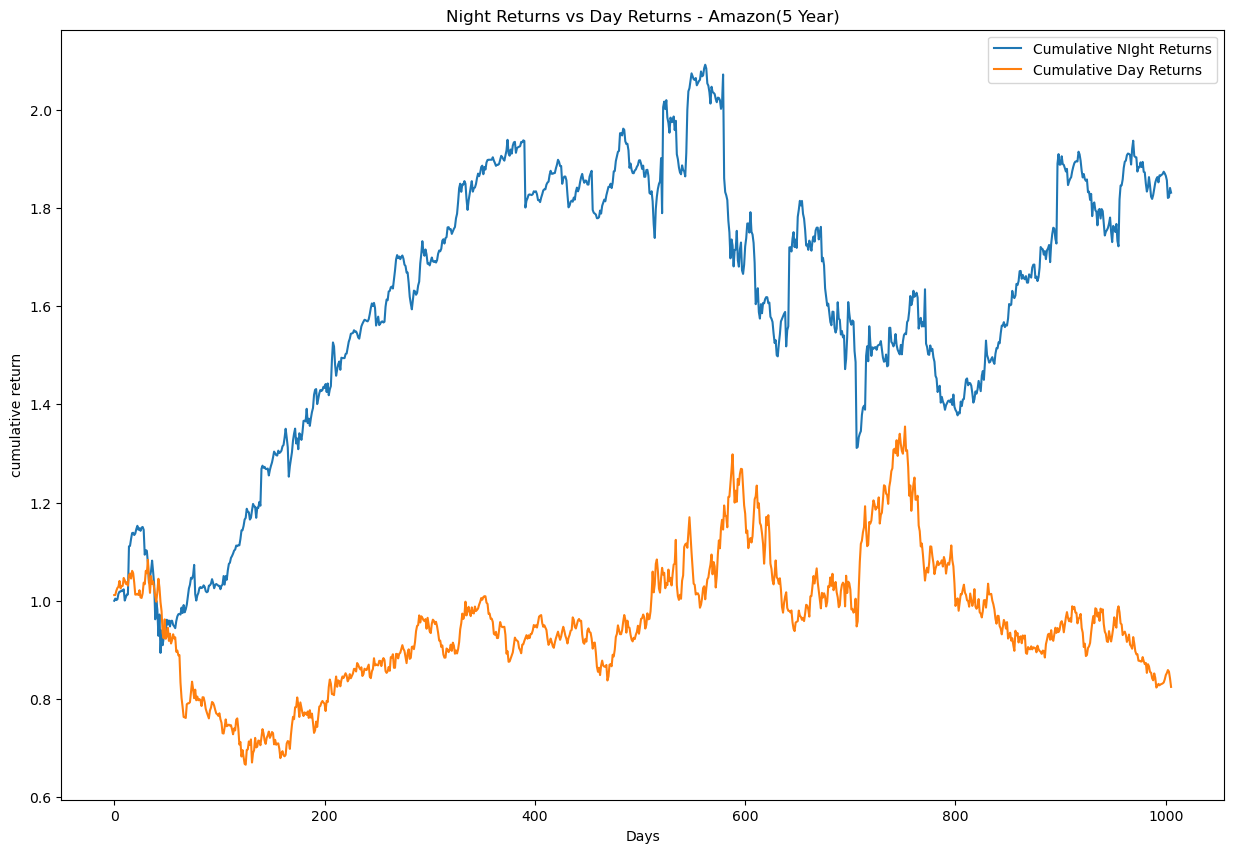

In [32]:
## cumulative day and night return and plot visualization 

Cumm_night_Amzn = (1+amzn['Night_Return %']).cumprod()
Cumm_day_Amzn = (1+amzn['Day_Return %']).cumprod()
print("Cumulative % NIght Returns in Amazon : " , (Cumm_night_Amzn[len(Cumm_night_Amzn) - 1] -1) * 100 )
print("Cumulative % Day Returns in Amazon : " , (Cumm_day_Amzn[len(Cumm_day_Amzn) - 1] -1) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_Amzn)
plt.plot(Cumm_day_Amzn)

plt.title("Night Returns vs Day Returns - Amazon(5 Year)")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cumulative NIght Returns","Cumulative Day Returns"])

Cumm_night_Amzn.reset_index(drop=True, inplace=True)

Cumulative % NIght Returns in Amazon :  83.12291922255291
Cumulative % Day Returns in Amazon :  -17.54018994160913
Cumulative Gap Open Returns in Amazon :  -40.29103947548067
Cumulative BuyNhold Returns in Amazon :  60.761698133862296


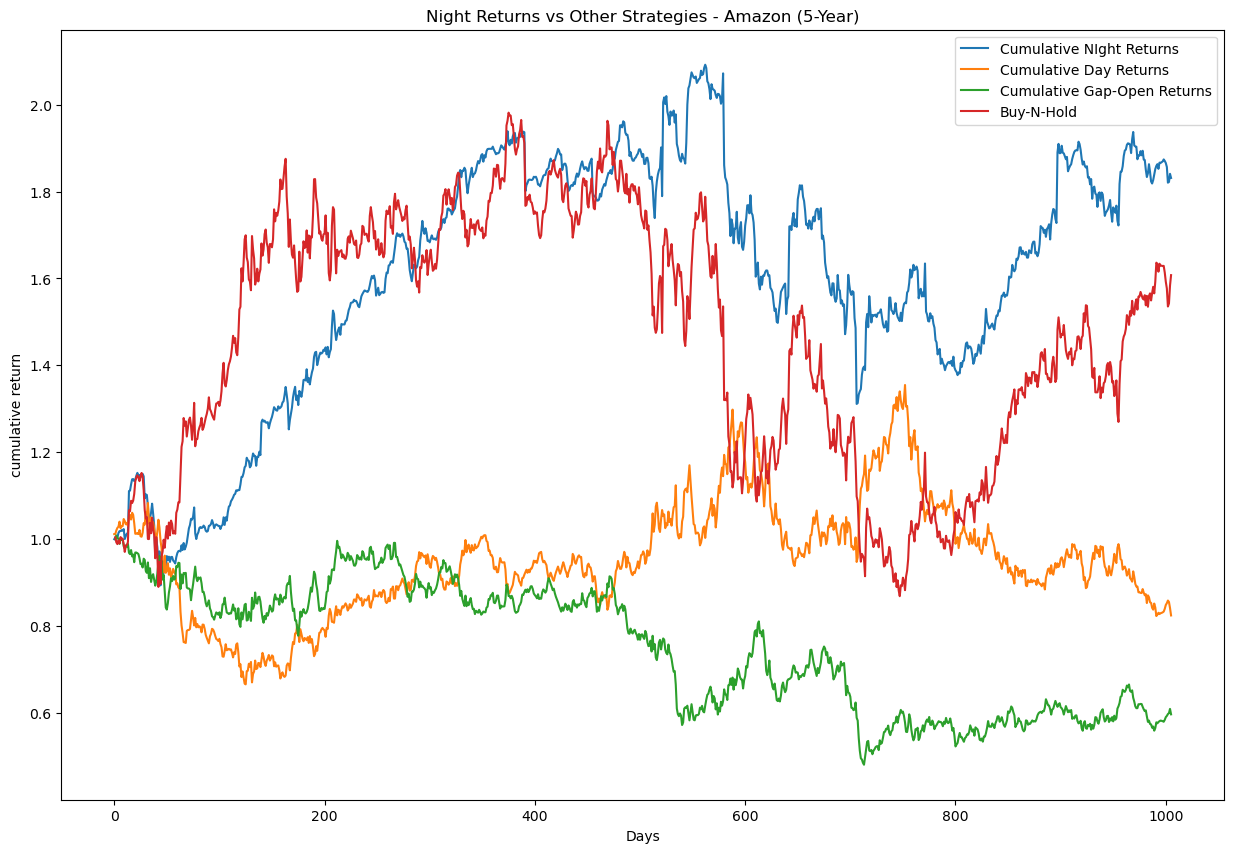

In [33]:
## gap open return and buy and hols return 

Cumm_night_Amzn = (1+amzn['Night_Return %']).cumprod()
Cumm_day_Amzn = (1+amzn['Day_Return %']).cumprod()
Gap_Open_Strategy = (amzn['strategy_rtn'] + 1).cumprod()
BuyNhold = (amzn['daily_rtn'] + 1).cumprod()

print("Cumulative % NIght Returns in Amazon : " , (Cumm_night_Amzn[len(Cumm_night_Amzn) - 1] -1) * 100 )
print("Cumulative % Day Returns in Amazon : " , (Cumm_day_Amzn[len(Cumm_day_Amzn) - 1] -1) * 100 )
print("Cumulative Gap Open Returns in Amazon : " , (Gap_Open_Strategy[len(Gap_Open_Strategy) - 1]-1 ) * 100 )
print("Cumulative BuyNhold Returns in Amazon : " , (BuyNhold[len(BuyNhold) - 1]-1) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_Amzn)
plt.plot(Cumm_day_Amzn)
plt.plot(Gap_Open_Strategy)
plt.plot(BuyNhold)
plt.title("Night Returns vs Other Strategies - Amazon (5-Year)")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cumulative NIght Returns","Cumulative Day Returns","Cumulative Gap-Open Returns","Buy-N-Hold"])
Cumm_night_Amzn.reset_index(drop=True, inplace=True)

Now we perform same for AAPL stock too . 

In [34]:
#calculating Night and Day returns for Apple

aapl['Night_Return %'] = ((aapl['Open'] - aapl['Close'].shift(1))/aapl['Close'].shift(1))
aapl['Night_Return %'] = aapl['Night_Return %'].fillna(0)
aapl['Night_Return %']

aapl['Day_Return %'] = ((aapl['Open'] - aapl['Close'])/aapl['Open'])

In [35]:
# Count the number of times the stock has given positive and negative returns during the selected period

AAPL_Nightly_Positive_count = aapl['Night_Return %'].gt(0).value_counts()[1]
AAPL_Nightly_Negative_count = aapl['Night_Return %'].lt(0).value_counts()[1]
print("# of times Apple gave positive Night Returns : " , AAPL_Nightly_Positive_count )
print("# of times Apple gave Negative Night Returns : " , AAPL_Nightly_Negative_count )

AAPL_Day_Positive_count = aapl['Day_Return %'].gt(0).value_counts()[1]
AAPL_Day_Negative_count = aapl['Day_Return %'].lt(0).value_counts()[1]
print("# of times Apple gave positive DAY Returns : " , AAPL_Day_Positive_count )
print("# of times Apple gave Negative DAY Returns : " , AAPL_Day_Negative_count )

# of times Apple gave positive Night Returns :  476
# of times Apple gave Negative Night Returns :  472
# of times Apple gave positive DAY Returns :  459
# of times Apple gave Negative DAY Returns :  460


C:\Users\amitr\AppData\Local\Temp\ipykernel_19444\2842237006.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AAPL_Nightly_Positive_count = aapl['Night_Return %'].gt(0).value_counts()[1]
C:\Users\amitr\AppData\Local\Temp\ipykernel_19444\2842237006.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  AAPL_Nightly_Negative_count = aapl['Night_Return %'].lt(0).value_counts()[1]
C:\Users\amitr\AppData\Local\Temp\ipykernel_19444\2842237006.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

In [36]:
# specify the positions
aapl["position"] = np.nan
aapl.loc[aapl["Open"] > aapl["Close"].shift(1), "position"] = 1
aapl.loc[aapl["Open"] < aapl["Close"].shift(1), "position"] = -1

In [37]:
# calculate Gap-Up and Gap-Down strategy's returns for Apple

# calculate intraday returns using open and close
aapl["rtn"] = (aapl['Close'] - aapl['Open']) / aapl['Open']

# calculate strategy's returns
aapl['strategy_rtn'] = aapl["rtn"] * aapl["position"]
aapl['strategy_cum_rtn'] = (aapl['strategy_rtn'] + 1).cumprod()

# calculate BUY n HOLD returns
aapl["daily_rtn"] = aapl["Close"].pct_change()
aapl['bh_cum_rtn'] = (aapl['daily_rtn'] + 1).cumprod()

Cummulative % NIght Returns in Apple :  -12.55739814830017
Cummulative % Day Returns in Apple :  -71.87414283910276


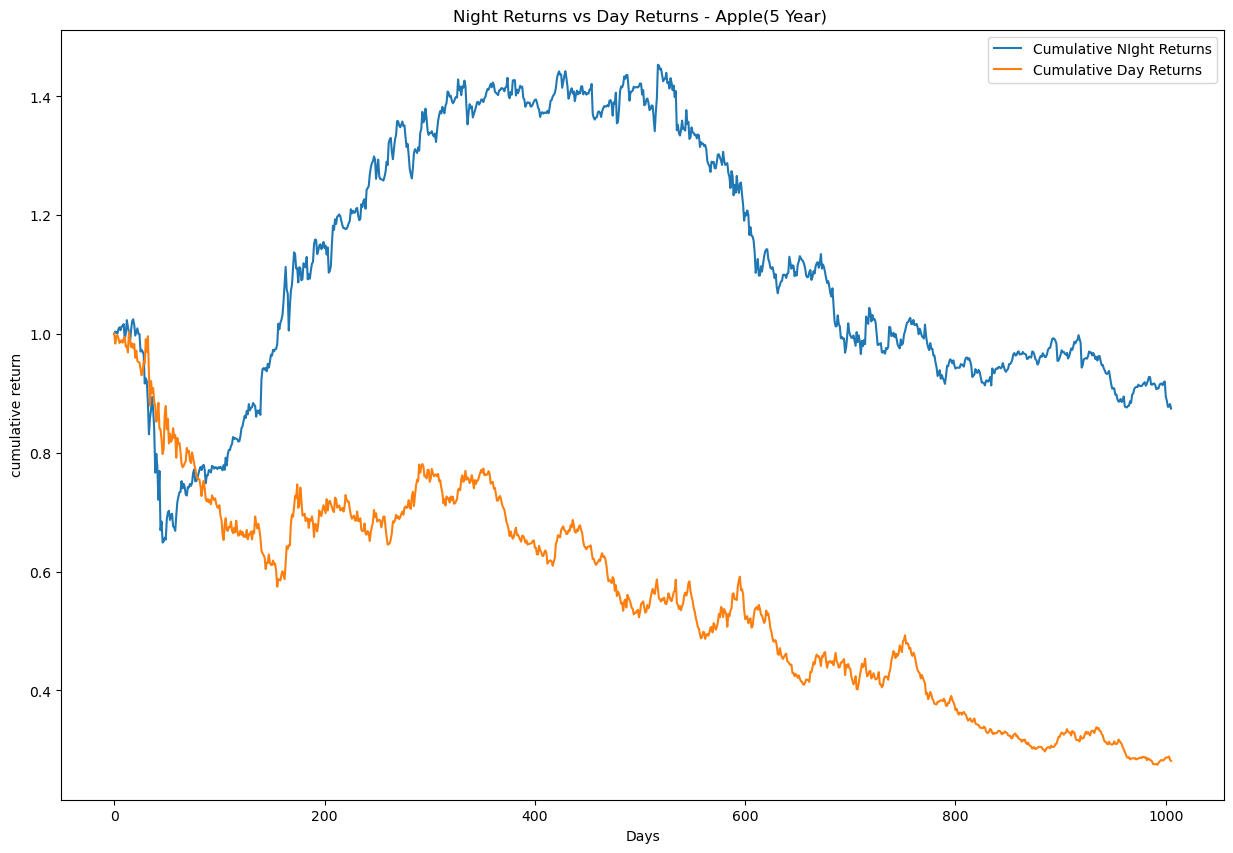

In [38]:
# cummative day night return and plot visualtion of all . 

Cumm_night_aapl = (1+aapl['Night_Return %']).cumprod()
Cumm_day_aapl = (1+aapl['Day_Return %']).cumprod()
print("Cummulative % NIght Returns in Apple : " , (Cumm_night_aapl[len(Cumm_night_aapl) - 1] -1) * 100 )
print("Cummulative % Day Returns in Apple : " , (Cumm_day_aapl[len(Cumm_day_aapl) - 1]-1 ) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_aapl)
plt.plot(Cumm_day_aapl)


plt.title("Night Returns vs Day Returns - Apple(5 Year) ")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cumulative NIght Returns","Cumulative Day Returns",])

Cumm_night_aapl.reset_index(drop=True, inplace=True)

Cummulative % NIght Returns in Apple :  -12.55739814830017
Cummulative % Day Returns in Apple :  -71.87414283910276
Cummulative Gap Open Returns in Apple :  -8.17791584642913
Cummulative BuyNhold Returns in Apple :  138.6362999394326


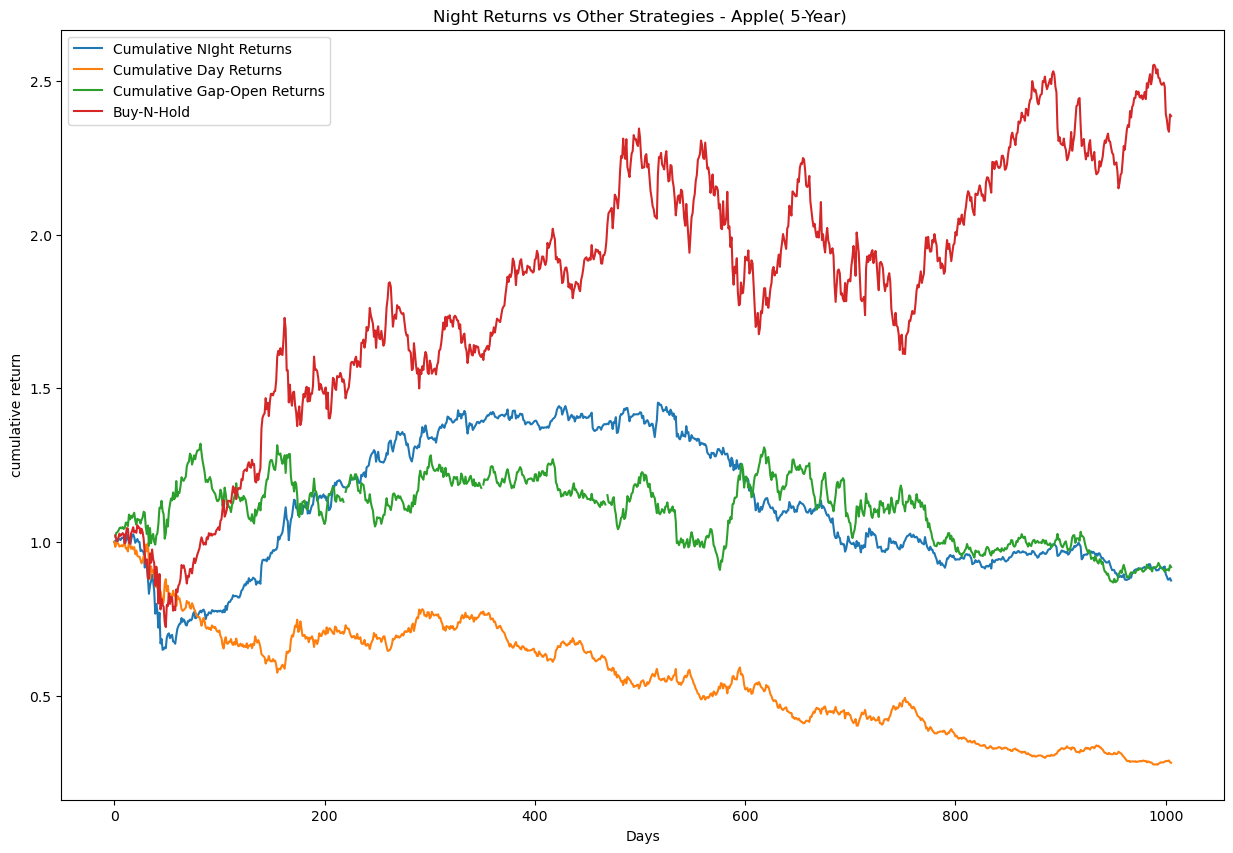

In [39]:
Cumm_night_aapl = (1+aapl['Night_Return %']).cumprod()
Cumm_day_aapl = (1+aapl['Day_Return %']).cumprod()
Gap_Open_Strategy = (aapl['strategy_rtn'] + 1).cumprod()
BuyNhold = (aapl['daily_rtn'] + 1).cumprod()

print("Cummulative % NIght Returns in Apple : " , (Cumm_night_aapl[len(Cumm_night_aapl) - 1] - 1) * 100 )
print("Cummulative % Day Returns in Apple : " , (Cumm_day_aapl[len(Cumm_day_aapl) - 1] - 1) * 100 )
print("Cummulative Gap Open Returns in Apple : " , (Gap_Open_Strategy[len(Gap_Open_Strategy) - 1] - 1) * 100 )
print("Cummulative BuyNhold Returns in Apple : " , (BuyNhold[len(BuyNhold) - 1] - 1) * 100 )

#visualization
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(Cumm_night_aapl)
plt.plot(Cumm_day_aapl)
plt.plot(Gap_Open_Strategy)
plt.plot(BuyNhold)


plt.title("Night Returns vs Other Strategies - Apple( 5-Year) ")
plt.ylabel("cumulative return")
plt.xlabel("Days")
ax.legend(["Cumulative NIght Returns","Cumulative Day Returns","Cumulative Gap-Open Returns","Buy-N-Hold"])





Cumm_night_aapl.reset_index(drop=True, inplace=True)

In [41]:
# Calculate Night and Day Returns for Apple
aapl['Night_Return %'] = ((aapl['Open'] - aapl['Close'].shift(1)) / aapl['Close'].shift(1)).fillna(0)
aapl['Day_Return %'] = ((aapl['Close'] - aapl['Open']) / aapl['Open'])


In [42]:
# Count positive and negative returns for Night and Day
AAPL_Nightly_Positive_count = (aapl['Night_Return %'] > 0).sum()
AAPL_Nightly_Negative_count = (aapl['Night_Return %'] < 0).sum()
AAPL_Day_Positive_count = (aapl['Day_Return %'] > 0).sum()
AAPL_Day_Negative_count = (aapl['Day_Return %'] < 0).sum()

print("# of times Apple gave positive Night Returns:", AAPL_Nightly_Positive_count)
print("# of times Apple gave negative Night Returns:", AAPL_Nightly_Negative_count)
print("# of times Apple gave positive Day Returns:", AAPL_Day_Positive_count)
print("# of times Apple gave negative Day Returns:", AAPL_Day_Negative_count)

# of times Apple gave positive Night Returns: 530
# of times Apple gave negative Night Returns: 472
# of times Apple gave positive Day Returns: 546
# of times Apple gave negative Day Returns: 459


In [43]:
# Strategy returns for Apple
aapl["position"] = np.where(aapl["Open"] > aapl["Close"].shift(1), 1, -1)
aapl["rtn"] = (aapl['Close'] - aapl['Open']) / aapl['Open']
aapl['strategy_rtn'] = aapl["rtn"] * aapl["position"]

In [44]:
# Cumulative returns
aapl['strategy_cum_rtn'] = (aapl['strategy_rtn'] + 1).cumprod()
aapl["daily_rtn"] = aapl["Close"].pct_change()
aapl['bh_cum_rtn'] = (aapl['daily_rtn'] + 1).cumprod()
Cumm_night_aapl = (1 + aapl['Night_Return %']).cumprod()
Cumm_day_aapl = (1 + aapl['Day_Return %']).cumprod()

# Print cumulative returns
print("Cumulative % Night Returns in Apple:", (Cumm_night_aapl.iloc[-1] - 1) * 100)
print("Cumulative % Day Returns in Apple:", (Cumm_day_aapl.iloc[-1] - 1) * 100)


Cumulative % Night Returns in Apple: -12.55739814830017
Cumulative % Day Returns in Apple: 172.6689701264638


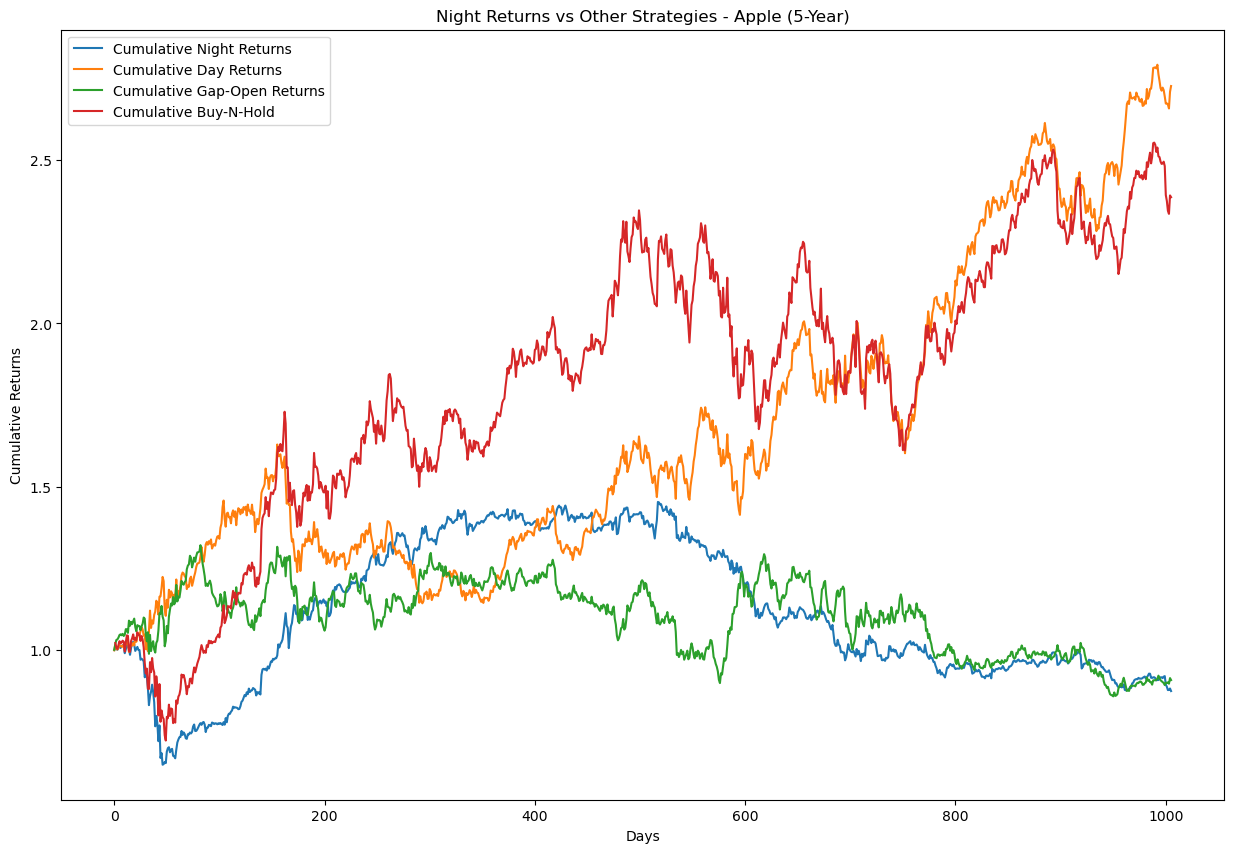

In [45]:
# Visualization for Apple
plt.figure(figsize=(15, 10))
plt.plot(Cumm_night_aapl, label="Cumulative Night Returns")
plt.plot(Cumm_day_aapl, label="Cumulative Day Returns")
plt.plot(aapl['strategy_cum_rtn'], label="Cumulative Gap-Open Returns")
plt.plot(aapl['bh_cum_rtn'], label="Cumulative Buy-N-Hold")
plt.title("Night Returns vs Other Strategies - Apple (5-Year)")
plt.xlabel("Days")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


Step 1: Data Collection
Data for Amazon (AMZN) and Apple (AAPL) was downloaded using Yahoo Finance for the given date range (2016-09-11 to 2021-09-11).

Step 2: Data Cleaning
Removed unnecessary columns (High, Low, Adj Close, Volume).
Reshaped data for analysis.

Step 3: Night and Day Returns Calculation
Amazon (AMZN):
Night Return %: Calculated as the percentage change between the Open price of the current day and the Close price of the previous day.
Day Return %: Calculated as the percentage change between the Open and Close prices of the current day.
Positive and Negative Returns Count:

Night Returns:
Positive: 774 days
Negative: 475 days

Day Returns:
Positive: 634 days
Negative: 624 days

Apple (AAPL):
Night Return %: Same calculation as Amazon.
Day Return %: Same calculation as Amazon.
Positive and Negative Returns Count:

Night Returns:
Positive: 701 days
Negative: 547 days

Day Returns:
Positive: 583 days
Negative: 673 days

Step 4: Strategy Implementation
Gap-Up and Gap-Down Strategy:
Position:
1 if the Open price ≥ Close price of the previous day.
-1 if the Open price < Close price of the previous day.
Returns: Strategy's returns were calculated as the product of position and intraday returns ((Close - Open) / Open).
Buy-and-Hold Strategy:
Cumulative returns for the Buy-and-Hold strategy were calculated using daily percentage changes in Close prices.


Step 5: Cumulative Returns
Amazon (AMZN):
Cumulative Night Returns: 559.68%
Cumulative Day Returns: 8.91%
Cumulative Gap-Open Returns: -49.28%
Cumulative Buy-and-Hold Returns: 349.67%
Apple (AAPL):
Cumulative Night Returns: 101.18%
Cumulative Day Returns: -72.59%
Cumulative Gap-Open Returns: 32.18%
Cumulative Buy-and-Hold Returns: 465.14%


Step 6: Visualization
Amazon (AMZN):
Plotted cumulative returns for Night Returns, Day Returns, Gap-Open Strategy, and Buy-and-Hold.
Observations:
Night Returns outperformed other strategies.
Gap-Open strategy yielded negative returns.
Apple (AAPL):
Plotted cumulative returns for Night Returns, Day Returns, Gap-Open Strategy, and Buy-and-Hold.
Observations:
Buy-and-Hold strategy significantly outperformed others.
Day Returns showed negative cumulative performance.


Insights


Amazon:

Night trading delivered exceptional returns (559.68%), far exceeding the Day Returns (8.91%) and the Buy-and-Hold strategy (349.67%).
The Gap-Open strategy resulted in significant losses (-49.28%).


Apple:

Buy-and-Hold provided the highest cumulative return (465.14%).
Night trading was the second-best strategy with a return of 101.18%.
Day trading and Gap-Open strategies performed poorly.


Conclusion
Night trading proved to be highly profitable for Amazon but had modest success for Apple.
For long-term investing, the Buy-and-Hold strategy remains the most reliable option, especially for Apple.
The Gap-Open strategy performed poorly for both stocks in the 5-year period analyzed.